In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/2015_Nepal_Earthquake_train.tsv', sep='\t', encoding='latin1')
df_test = pd.read_csv('/content/2015_Nepal_Earthquake_test.tsv', sep='\t', encoding='latin1')

In [ ]:
df_train.head()

,tweet_id,text,label
0,591902739002560512,RT @AnupKaphle: #Nepal's prime minister addres...,relevant
1,592939706788216832,@jonsnowC4 So have we; read our friends blog f...,relevant
2,592591542168252416,Lend a helping hand if you can #Nepal https://...,relevant
3,591903009279385600,@shilpaanand they've managed to reach Kathmand...,relevant
4,592099765271199744,Israel Sending Aid Teams to Nepal After Quake:...,relevant


In [ ]:
df_test.head()

,tweet_id,text,label
0,591903220357730304,RT @Hadithoftheday: Do your bit for the victim...,relevant
1,592589555812864003,RT @ANI_news: Indians evacuated from #NepalEar...,relevant
2,592825666262929408,Free call to Nepal via Skype! Thanks Skype! ht...,relevant
3,591903276750114816,To #Kathmandu and back: â°ÃÃ·Even now when I...,relevant
4,591902696375877632,My thoughts and prayers to everyone in Nepal.....,relevant


In [ ]:
df_train.isnull().sum()

tweet_id    0
text        0
label       0
dtype: int64

In [ ]:
df_test.isnull().sum()

tweet_id    0
text        0
label       0
dtype: int64

In [ ]:
df_train.shape

(6899, 3)

In [ ]:
df_test.shape

(3479, 3)

In [ ]:
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train.drop_duplicates(subset='text',inplace=True)
df_test.drop_duplicates(subset='text',inplace=True)

In [ ]:
stop_words = set(stopwords.words('english'))
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
stemmer = SnowballStemmer('english')

In [ ]:
def clean_tweet(tweet, remove_emojis=True):
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    if remove_emojis:
        temp = temp.encode('ascii', 'ignore').decode('utf8').strip()
    temp = temp.split()

    temp = [w for w in temp if not w in swords]
    temp = [stemmer.stem(w) for w in temp]

    temp = " ".join(temp)
    return temp

In [ ]:
df_train['clean_text']= df_train['text'].apply(lambda x:clean_tweet(x))
df_test['clean_text']= df_test['text'].apply(lambda x:clean_tweet(x))

In [ ]:
df_train['label'].value_counts()

not_relevant    3603
relevant        3289
Name: label, dtype: int64

In [ ]:
df_train['label'] = df_train['label'].map({'relevant': 1, 'not_relevant': 0})
df_test['label'] = df_test['label'].map({'relevant': 1, 'not_relevant': 0})

In [ ]:
df_train['label']

0       1
1       1
2       1
3       1
4       1
       ..
6894    0
6895    0
6896    0
6897    0
6898    0
Name: label, Length: 6892, dtype: int64

In [ ]:
df_train.head()

,tweet_id,text,label,clean_text
0,591902739002560512,RT @AnupKaphle: #Nepal's prime minister addres...,1,prime minist address countri 1st time sinc ear...
1,592939706788216832,@jonsnowC4 So have we; read our friends blog f...,1,read friend blog lamjung work
2,592591542168252416,Lend a helping hand if you can #Nepal https://...,1,lend help hand
3,591903009279385600,@shilpaanand they've managed to reach Kathmand...,1,theyv manag reach kathmandu help guid offici e...
4,592099765271199744,Israel Sending Aid Teams to Nepal After Quake:...,1,israel send aid team nepal quak israel send de...


In [ ]:
df_test.head()

,tweet_id,text,label,clean_text
0,591903220357730304,RT @Hadithoftheday: Do your bit for the victim...,1,bit victim devast earthquak nepal donat via hu...
1,592589555812864003,RT @ANI_news: Indians evacuated from #NepalEar...,1,indian evacu reach ahmedabad airport
2,592825666262929408,Free call to Nepal via Skype! Thanks Skype! ht...,1,free call nepal via skype thank skype
3,591903276750114816,To #Kathmandu and back: â°ÃÃ·Even now when I...,1,back even stand feel though earth move
4,591902696375877632,My thoughts and prayers to everyone in Nepal.....,1,thought prayer everyon nepal


In [ ]:
df_train['tokenized']=df_train['clean_text'].apply(lambda x: x.split())
df_test['tokenized']=df_test['clean_text'].apply(lambda x: x.split())

In [ ]:
df_train.head()

,tweet_id,text,label,clean_text,tokenized
0,591902739002560512,RT @AnupKaphle: #Nepal's prime minister addres...,1,prime minist address countri 1st time sinc ear...,"[prime, minist, address, countri, 1st, time, s..."
1,592939706788216832,@jonsnowC4 So have we; read our friends blog f...,1,read friend blog lamjung work,"[read, friend, blog, lamjung, work]"
2,592591542168252416,Lend a helping hand if you can #Nepal https://...,1,lend help hand,"[lend, help, hand]"
3,591903009279385600,@shilpaanand they've managed to reach Kathmand...,1,theyv manag reach kathmandu help guid offici e...,"[theyv, manag, reach, kathmandu, help, guid, o..."
4,592099765271199744,Israel Sending Aid Teams to Nepal After Quake:...,1,israel send aid team nepal quak israel send de...,"[israel, send, aid, team, nepal, quak, israel,..."


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
sentences = [['affected', 'need',
 'aftermath',
 'arrest',
 'attack',
 'authorities',
 'blast',
 'bomber',
 'bombing',
 'braces',
 'buried',
 'bushfire',
 'casualties',
 'cleanup',
 'collapse',
 'collapsed',
 'conditions',
 'crash',
 'crisis',
 'damage',
 'dangerous',
 'dead',
 'deadly',
 'death',
 'destroyed',
 'destruction',
 'devastating',
 'disaster',
 'displaced',
 'donate',
 'dozens',
 'dramatic',
 'drown',
 'emergency',
 'enforcement',
 'evacuated',
 'evacuees',
 'events',
 'explosion',
 'fatalities',
 'firefighters',
 'flood',
 'flooding',
 'floodwaters',
 'footage',
 'help!',
 'hurricane',
 'imminent',
 'impacted',
 'injured',
 'injuries',
 'inundated',
 'investigation',
 'landfall',
 'levy',
 'looting',
 'magnitude',
 'massive',
 'military',
 'nursing',
 'outage',
 'prayers',
 'praying',
 'ravaged',
 'rebuild',
 'rebuilt',
 'recede',
 'recover',
 'redcross',
 'relief',
 'rescue',
 'rescuers',
 'residents',
 'responders',
 'rubble',
 'saddened',
 'safety',
 'seismic',
 'shelter',
 'soldier',
 'storm',
 'stream',
 'surviving',
 'survivor',
 'terrifying',
 'terror',
 'toll',
 'tornado',
 'torrential',
 'toxins',
 'tragedy',
 'tragic',
 'troops',
 'twister',
 'unaccounted',
 'urgent',
 'victims',
 'volunteers',
 'warning',
 'wounded']]

In [ ]:
word2vec1 = gensim.models.Word2Vec(sentences, min_count = 1,size = 100, window = 5, sg=0)

In [ ]:
word2vec2 = gensim.models.Word2Vec(df_train['tokenized'], min_count = 1,size = 100, window = 5, sg=0)

In [ ]:
word2vec2.train(df_train['tokenized'], total_examples=word2vec2.corpus_count, epochs=word2vec2.epochs)

(246973, 278790)

In [ ]:
word2vec2.wv.most_similar("help")

[('pleas', 0.9990265965461731),
 ('support', 0.9970386028289795),
 ('us', 0.996990978717804),
 ('let', 0.9962489604949951),
 ('friend', 0.9955359101295471),
 ('need', 0.9949182271957397),
 ('give', 0.9948223829269409),
 ('amp', 0.9942301511764526),
 ('thank', 0.9941924214363098),
 ('precious', 0.9938349723815918)]

In [ ]:
sim_words = word2vec1.wv.most_similar('blast')
print(sim_words)

[('destroyed', 0.19037997722625732), ('magnitude', 0.18884752690792084), ('massive', 0.1840694546699524), ('military', 0.18279783427715302), ('displaced', 0.16949763894081116), ('recover', 0.1667279303073883), ('help!', 0.16128280758857727), ('rubble', 0.15881605446338654), ('wounded', 0.1432119607925415), ('affected', 0.13639605045318604)]


In [ ]:
#model2.accuracy(df_train['tokenized'])

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(df_train.clean_text)
word_index = tokenizer.word_index
print(word_index)

{'nepal': 1, 'earthquak': 2, 'help': 3, 'peopl': 4, 'amp': 5, 'prayer': 6, 'god': 7, 'quak': 8, 'donat': 9, 'pleas': 10, 'u': 11, 'india': 12, '2': 13, '4': 14, 'news': 15, 'kathmandu': 16, 'relief': 17, 'send': 18, 'love': 19, 'f': 20, 'go': 21, 'via': 22, 'one': 23, 'thank': 24, 'death': 25, 'victim': 26, 'rescu': 27, '1': 28, 'toll': 29, 'devast': 30, 'say': 31, 'disast': 32, 'pray': 33, 'indian': 34, 'heart': 35, 'team': 36, 'support': 37, 'live': 38, 'may': 39, 'aid': 40, 'hope': 41, 'day': 42, 'us': 43, 'need': 44, '7': 45, 'like': 46, 'hit': 47, '3': 48, 'let': 49, 'know': 50, 'time': 51, 'today': 52, 'baltimor': 53, 'bless': 54, 'famili': 55, 'affect': 56, '5': 57, 'much': 58, 'see': 59, 'safe': 60, 'good': 61, 'everest': 62, 'think': 63, 'friend': 64, 'work': 65, 'mani': 66, 'dont': 67, 'give': 68, 'dead': 69, 'miss': 70, 'make': 71, 'effort': 72, 'strong': 73, 'stay': 74, 'world': 75, 'still': 76, 'get': 77, 'kill': 78, 'countri': 79, 'n': 80, 'everyon': 81, 'relev': 82, 'tak

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 7580


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Conv2D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = df_train['clean_text']
y_train = df_train['label']

In [ ]:
X_test = df_test['clean_text']
y_test =df_test['label']

# Glove Word Embedding

In [ ]:
path_to_glove_file = './glove.6B.300d.txt'
embedding_dim = 300
learning_rate = 0.01
batch_size = 1024
epochs = 10
sequence_len = 100

In [ ]:
y_train_LSTM = y_train.values.reshape(-1,1)
y_test_LSTM = y_test.values.reshape(-1,1)

print("Training Y shape:", y_train_LSTM.shape)
print("Testing Y shape:", y_test_LSTM.shape)

Training Y shape: (6892, 1)
Testing Y shape: (3479, 1)


In [ ]:
# Tokenize train data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  7580


In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=sequence_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=sequence_len)

In [ ]:
print("Training X shape: ", X_train.shape)
print("Testing X shape: ", X_test.shape)

Training X shape:  (6892, 100)
Testing X shape:  (3479, 100)


In [ ]:
# Read word embeddings
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 18188 word vectors.


In [ ]:
# Define embedding layer in Keras
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            weights=[embedding_matrix],
                                            input_length=sequence_len,
                                            trainable=False)

# *1. BLSTM*

In [ ]:
sequence_input = Input(shape=(sequence_len, ), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = Conv1D(128, 5, activation='relu')(embedding_sequences)
x = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          2274000   
                                                                 
 conv1d_8 (Conv1D)           (None, 96, 128)           192128    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                           

In [ ]:
# Optimize the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 73s 10s/step - loss: 1.0998 - accuracy: 0.4929 - val_loss: 0.6889 - val_accuracy: 0.5297
Epoch 2/10
7/7 [==============================] - 64s 9s/step - loss: 0.6800 - accuracy: 0.5223 - val_loss: 0.6611 - val_accuracy: 0.5297
Epoch 3/10
7/7 [==============================] - 63s 9s/step - loss: 0.6660 - accuracy: 0.5228 - val_loss: 0.6501 - val_accuracy: 0.5297
Epoch 4/10
7/7 [==============================] - 65s 9s/step - loss: 0.6504 - accuracy: 0.5691 - val_loss: 0.6428 - val_accuracy: 0.6579
Epoch 5/10
7/7 [==============================] - 64s 9s/step - loss: 0.6361 - accuracy: 0.6647 - val_loss: 0.6233 - val_accuracy: 0.6654
Epoch 6/10
7/7 [==============================] - 67s 10s/step - loss: 0.6133 - accuracy: 0.6734 - val_loss: 0.6141 - val_accuracy: 0.6761
Epoch 7/10
7/7 [==============================] - 64s 9s/step - loss: 0.5959 - accuracy: 0.6891 - val_loss: 0.6098 - val_accuracy: 0.6712
Epoch 8/10
7/7 [================

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

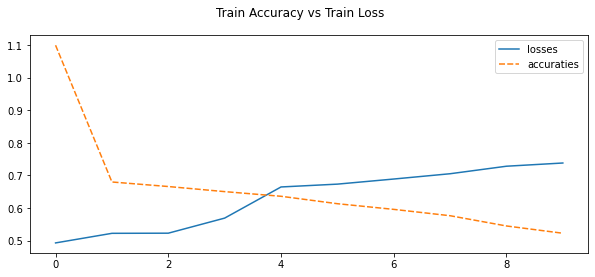

In [ ]:
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

In [ ]:
#Evaluate the model
predicted = model.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))


1/1 [==============================] - 11s 11s/step - loss: 0.6289 - accuracy: 0.6660
Test Accuracy:  0.6659959554672241
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1843
           1       0.70      0.50      0.59      1636

    accuracy                           0.67      3479
   macro avg       0.67      0.66      0.65      3479
weighted avg       0.67      0.67      0.66      3479



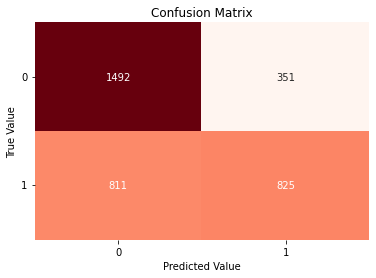

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

In [ ]:
model = load_model(filepath, compile = True)

In [ ]:
X_new=['free call nepal via skype thank skype','read friend blog lamjung work','Wow... praying for the people affected by the massive earthquake in #Nepal']

# 2. LSTM

In [ ]:
x = Conv1D(128, 5, activation='relu')(embedding_sequences)
x = LSTM(128, dropout=0.5, recurrent_dropout=0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model2 = Model(sequence_input, outputs)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          2274000   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           192128    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               2626

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 42s 6s/step - loss: 1.1568 - accuracy: 0.5414 - val_loss: 0.6377 - val_accuracy: 0.6508
Epoch 2/10
7/7 [==============================] - 38s 6s/step - loss: 0.6453 - accuracy: 0.6410 - val_loss: 0.6246 - val_accuracy: 0.6625
Epoch 3/10
7/7 [==============================] - 38s 6s/step - loss: 0.6158 - accuracy: 0.6741 - val_loss: 0.6086 - val_accuracy: 0.6703
Epoch 4/10
7/7 [==============================] - 38s 6s/step - loss: 0.5990 - accuracy: 0.6808 - val_loss: 0.5963 - val_accuracy: 0.6930
Epoch 5/10
7/7 [==============================] - 42s 6s/step - loss: 0.5650 - accuracy: 0.7142 - val_loss: 0.5878 - val_accuracy: 0.7082
Epoch 6/10
7/7 [==============================] - 38s 6s/step - loss: 0.5462 - accuracy: 0.7258 - val_loss: 0.5767 - val_accuracy: 0.7154
Epoch 7/10
7/7 [==============================] - 38s 6s/step - loss: 0.5069 - accuracy: 0.7500 - val_loss: 0.5886 - val_accuracy: 0.7059
Epoch 8/10
7/7 [==================

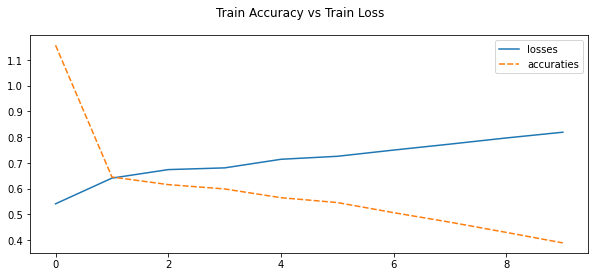

In [ ]:
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

In [ ]:
#Evaluate the model
predicted = model2.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = model2.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

1/1 [==============================] - 5s 5s/step - loss: 0.7150 - accuracy: 0.6930
Test Accuracy:  0.6930152177810669
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1843
           1       0.69      0.62      0.66      1636

    accuracy                           0.69      3479
   macro avg       0.69      0.69      0.69      3479
weighted avg       0.69      0.69      0.69      3479



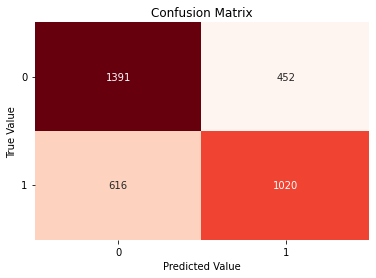

In [ ]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

# CNN

In [ ]:
from tensorflow.keras.layers import Flatten, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
x = Conv1D(32,3, activation='relu')(embedding_sequences)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x = Dropout(0.5)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
outputs=Dense(5,activation='softmax')(x)
model4 = Model(sequence_input, outputs)
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          2274000   
                                                                 
 conv1d_5 (Conv1D)           (None, 98, 32)            28832     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 30, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 64)           0         
 1D)                                                       

In [ ]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model4.fit(X_train,
                    y_train,
                    batch_size=100,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
69/69 [==============================] - 6s 83ms/step - loss: 0.8330 - accuracy: 0.5492 - val_loss: 0.6630 - val_accuracy: 0.6433
Epoch 2/10
69/69 [==============================] - 6s 85ms/step - loss: 0.6424 - accuracy: 0.6431 - val_loss: 0.6333 - val_accuracy: 0.6482
Epoch 3/10
69/69 [==============================] - 6s 81ms/step - loss: 0.6106 - accuracy: 0.6653 - val_loss: 0.6007 - val_accuracy: 0.6887
Epoch 4/10
69/69 [==============================] - 6s 80ms/step - loss: 0.5795 - accuracy: 0.7008 - val_loss: 0.5953 - val_accuracy: 0.6853
Epoch 5/10
69/69 [==============================] - 6s 80ms/step - loss: 0.5488 - accuracy: 0.7221 - val_loss: 0.6119 - val_accuracy: 0.6910
Epoch 6/10
69/69 [==============================] - 6s 81ms/step - loss: 0.5167 - accuracy: 0.7470 - val_loss: 0.6018 - val_accuracy: 0.6976
Epoch 7/10
69/69 [==============================] - 5s 79ms/step - loss: 0.4799 - accuracy: 0.7705 - val_loss: 0.6231 - val_accuracy: 0.6939
Epoch 8/10
69

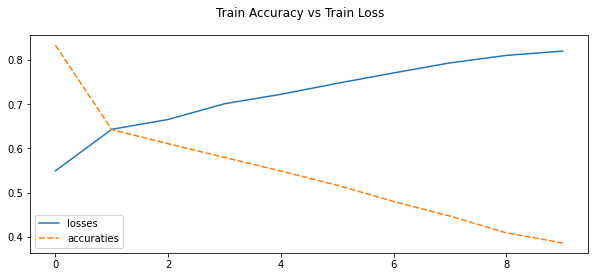

In [ ]:
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

In [ ]:
#Evaluate the model
y_pred=model4.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

109/109 [==============================] - 1s 9ms/step


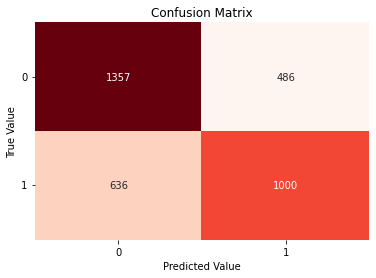

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

In [ ]:
score, test_accuracy = model4.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_pred))

1/1 [==============================] - 1s 690ms/step - loss: 0.7291 - accuracy: 0.6775
Test Accuracy:  0.6774935126304626
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1843
           1       0.67      0.61      0.64      1636

    accuracy                           0.68      3479
   macro avg       0.68      0.67      0.67      3479
weighted avg       0.68      0.68      0.68      3479



# BLSTM with attention

In [ ]:
x = Conv1D(128, 5, activation='relu')(embedding_sequences)
x = Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model3 = Model(sequence_input, outputs)
model3.summary()

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))